In [1]:
from utils import load_cnf, cnf_to_bqm
from embedding_utils import *
import seaborn as sns
from redundancy import *
from utils import *

In [2]:
folder = 'sat'
_variables = 160
path = f"./{folder}/sgen1-{folder}-{_variables}-100.cnf"

In [3]:
num_variables, num_clauses, variables, clauses = load_cnf(path)
bqm, or_result_vars, clauses_qubits = cnf_to_bqm(variables, clauses)

1595


<AxesSubplot:ylabel='Count'>

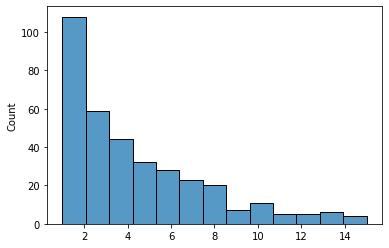

In [4]:
embedding = get_embedding(bqm, 40) #121
print(count_qubits_used(embedding))
sns.histplot(get_chain_lengths(bqm, embedding)[0])

In [5]:
qubo, embedding_qubo = remove_chains(embedding)
qubo.scale(0.5)

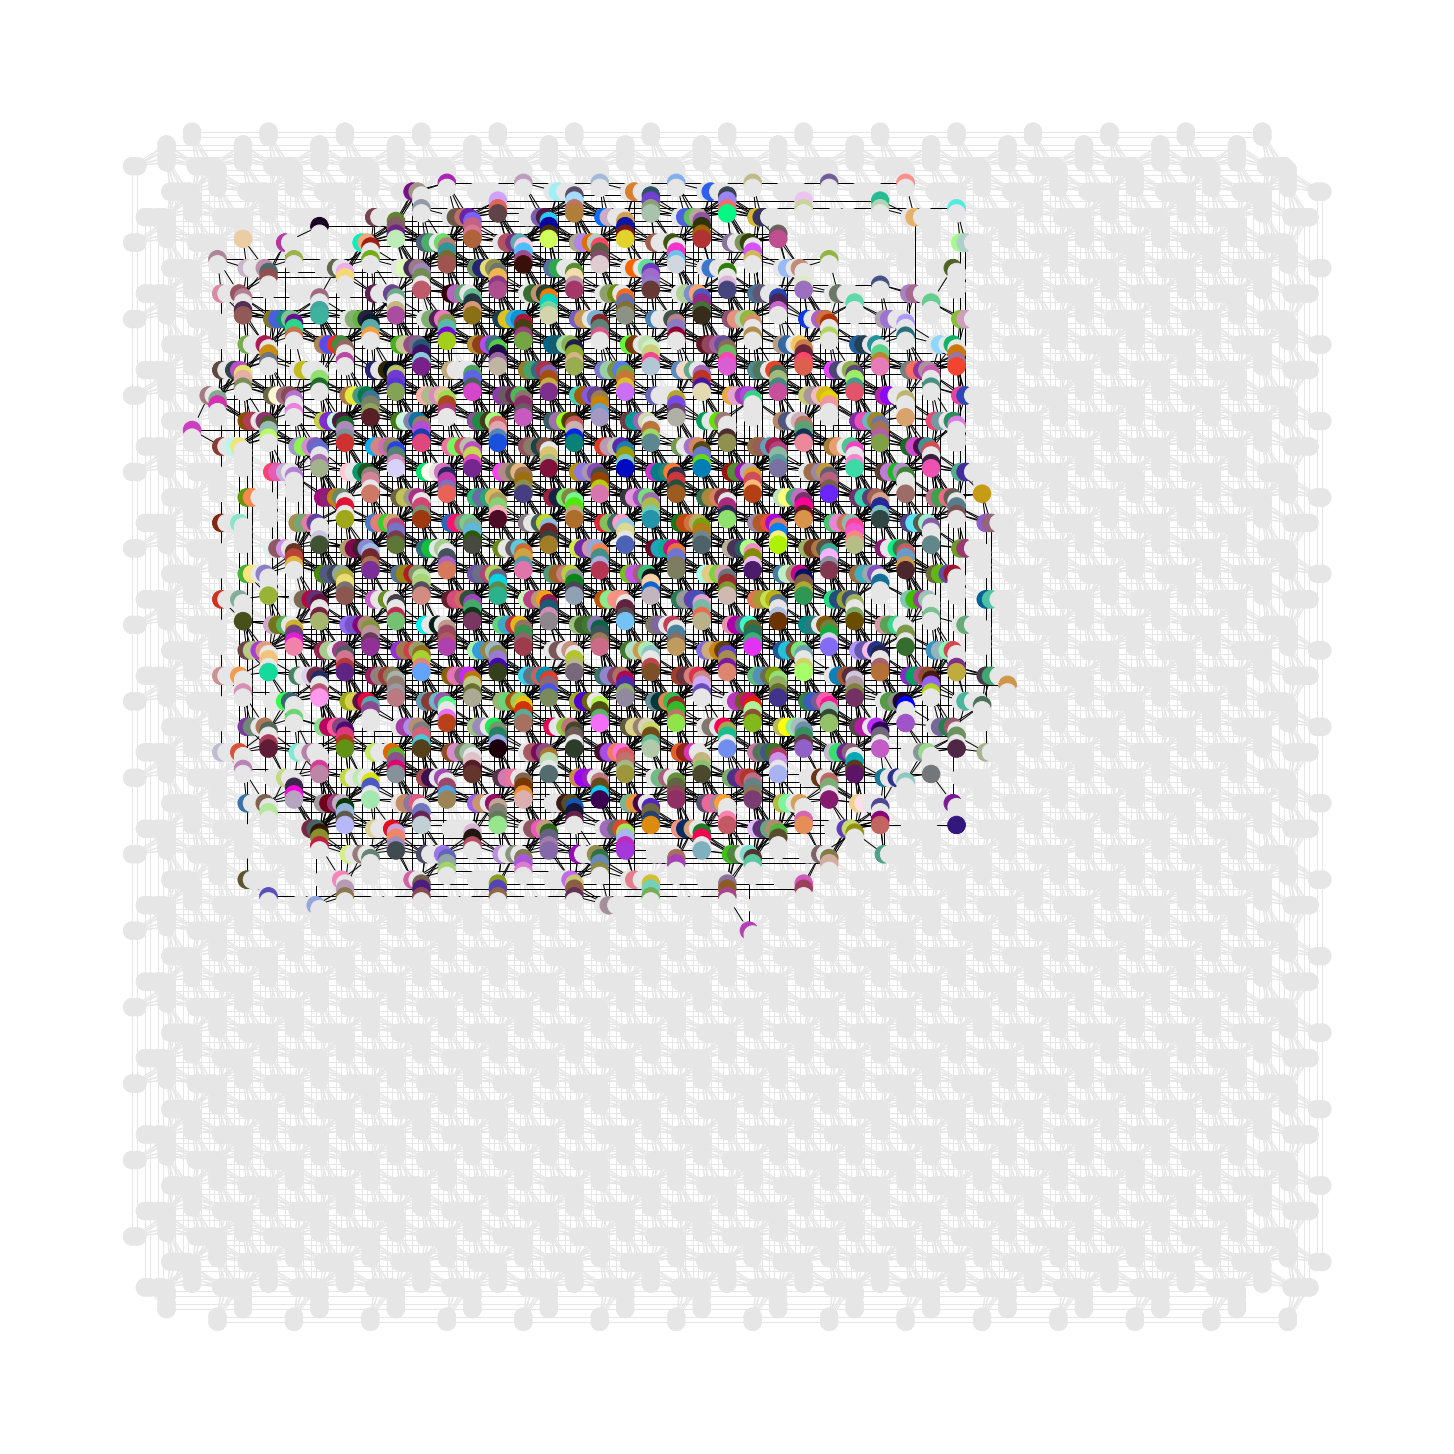

In [11]:
import dimod 
import networkx as nx
import dwave_networkx as dnx
from matplotlib.pyplot import figure

bqm_graph = dimod.to_networkx_graph(qubo)
figure(figsize=(20, 20))
dnx.draw_pegasus_embedding(dnx.pegasus_graph(16),embedding_qubo)

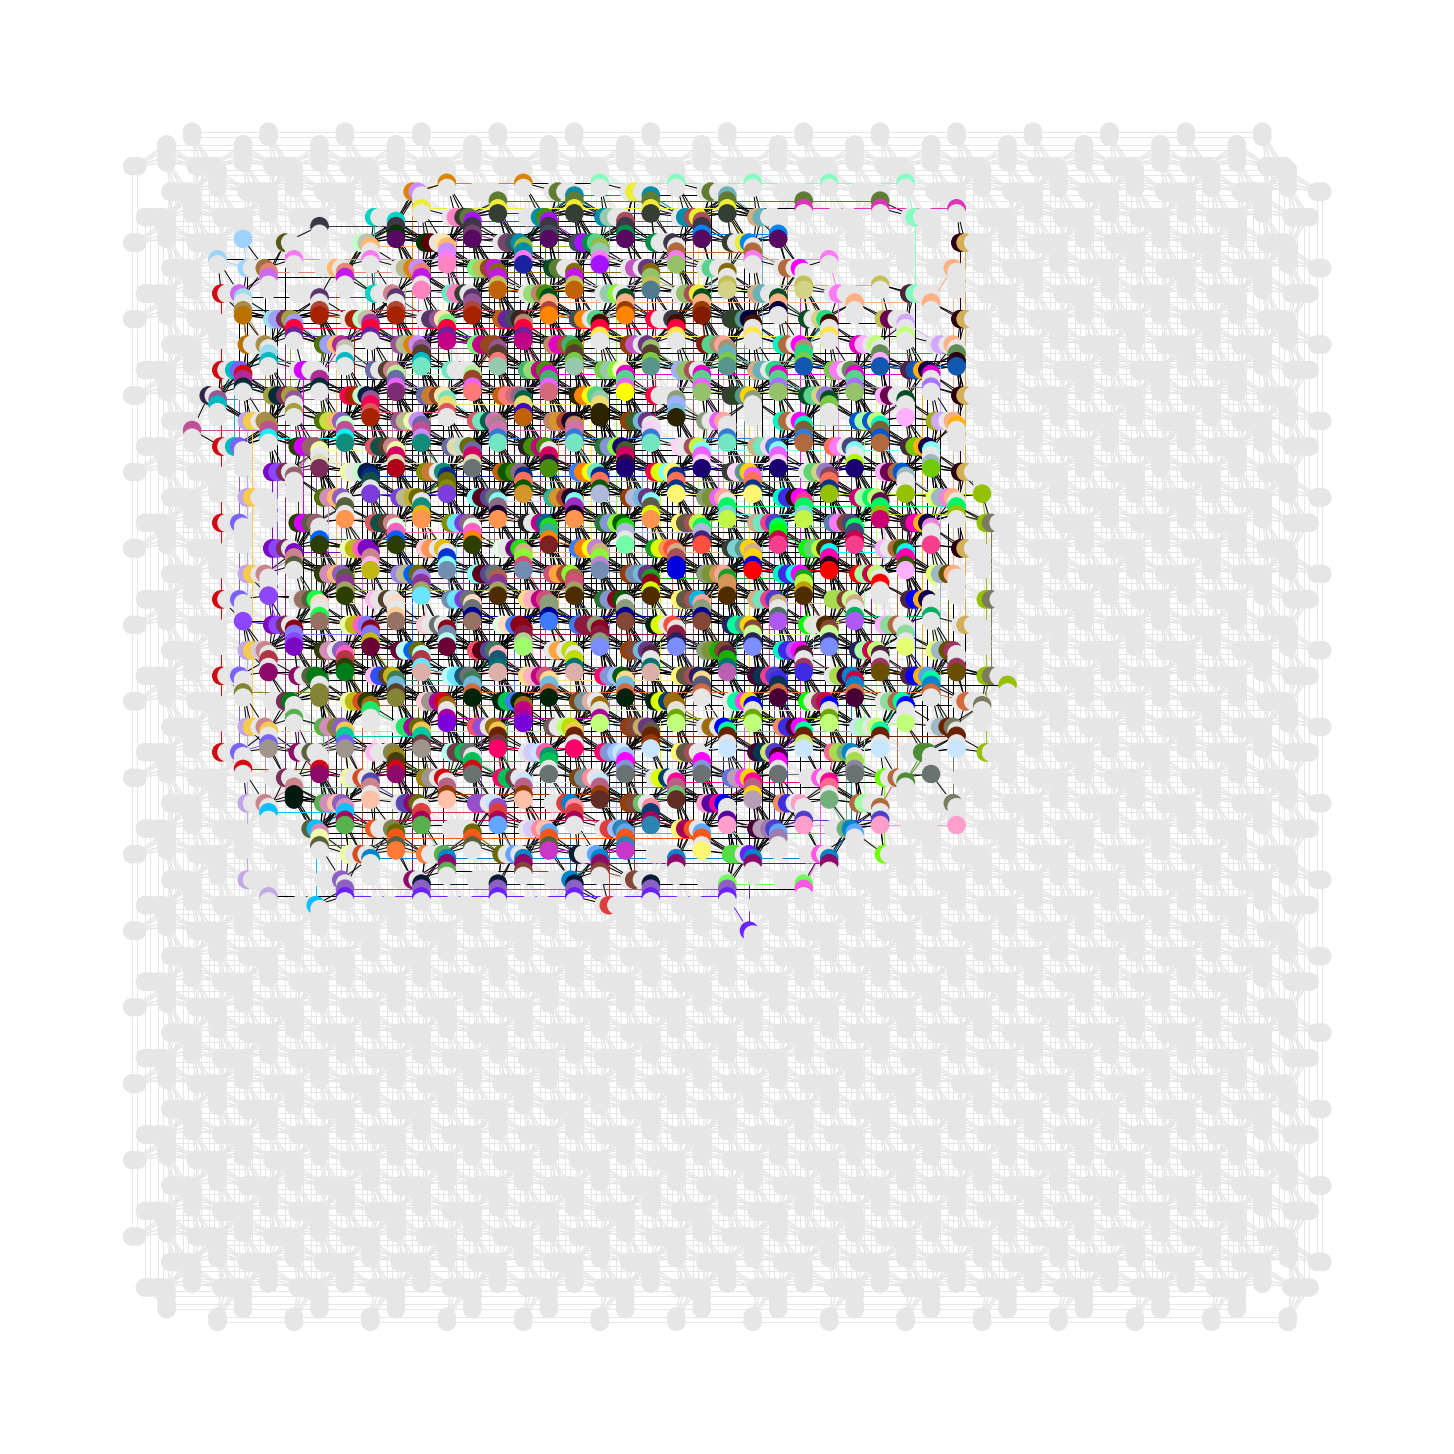

In [13]:
bqm_graph = dimod.to_networkx_graph(bqm)
figure(figsize=(20, 20))
dnx.draw_pegasus_embedding(dnx.pegasus_graph(16),embedding)

In [ ]:
print(qubo.linear())

In [13]:
qubo2 = get_embedded_bqm(bqm, embedding)

In [23]:
from dwave.preprocessing.lower_bounds import roof_duality
roof_duality(qubo)

(-72.50000000000011,
 {3924: 1,
  3923: 1,
  1879: 1,
  3909: 1,
  1057: 1,
  3753: 1,
  784: 1,
  724: 1,
  860: 1,
  859: 1,
  861: 1,
  4207: 1,
  4206: 1,
  4205: 1,
  4057: 1,
  4055: 1,
  4056: 1,
  4054: 1,
  1298: 1,
  4521: 1,
  1297: 1,
  534: 1,
  533: 1,
  4701: 1,
  532: 1,
  531: 1,
  4697: 1,
  530: 1,
  529: 1,
  528: 1,
  4698: 1,
  4699: 1,
  4700: 1,
  4702: 1,
  4293: 1,
  697: 1,
  757: 1,
  4295: 1,
  4294: 1,
  3741: 1,
  3742: 1,
  3743: 1,
  3739: 1,
  3740: 1,
  3125: 1,
  3124: 1,
  1096: 1,
  3230: 1,
  1070: 1,
  4623: 1,
  4622: 1,
  1956: 1,
  4195: 1,
  4194: 1,
  3729: 1,
  1939: 1,
  1941: 1,
  1942: 1,
  3700: 1,
  1940: 1,
  3697: 1,
  1459: 1,
  3698: 1,
  1533: 1,
  1323: 1,
  3621: 1,
  3141: 1,
  3140: 1,
  3142: 1,
  1306: 1,
  1307: 1,
  3138: 1,
  3139: 1,
  3361: 1,
  377: 1,
  497: 1,
  902: 1,
  903: 1,
  904: 1,
  3589: 1,
  3289: 1,
  3290: 1,
  602: 1,
  549: 1,
  548: 1,
  547: 1,
  4577: 1,
  545: 1,
  544: 1,
  3662: 1,
  3663: 1,
  5

In [22]:
qubo.update(qubo2)